In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras import losses,metrics,optimizers
from tensorflow.keras import layers

tr_images = []
tr_labels = []

ts_images = []
ts_labels = []



In [ ]:
#loading the data

In [2]:
directory = './databrain/Training'
for f in os.scandir(directory):
    if f.name == "glioma" :
        for file in  os.scandir(f.path) :
            tr_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            tr_labels.append([0,1,0,0])
    elif f.name == "notumor":
        for file in  os.scandir(f.path) :
            tr_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            tr_labels.append([0,0,1,0])
    elif f.name == "pituitary":
        for file in  os.scandir(f.path) :
            tr_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            tr_labels.append([0,0,0,1])
    else:
        for file in  os.scandir(f.path) :
            tr_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            tr_labels.append([1,0,0,0])

In [2]:
directory = './databrain/Testing'
for f in os.scandir(directory):
    if f.name == "glioma" :
        for file in  os.scandir(f.path) :
            ts_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            ts_labels.append([0,1,0,0])
    elif f.name == "notumor":
        for file in  os.scandir(f.path) :
            ts_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            ts_labels.append([0,0,1,0])
    elif f.name == "pituitary":
        for file in  os.scandir(f.path) :
            ts_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            ts_labels.append([0,0,0,1])
    else:
        for file in  os.scandir(f.path) :
            ts_images.append(np.asarray(Image.open(file.path).convert('L').resize((256,256))))
            ts_labels.append([1,0,0,0])

In [3]:
tr_images = np.asarray(tr_images)
ts_labels = np.asarray(ts_labels)
tr_labels = np.asarray(tr_labels)
ts_images = np.asarray(ts_images)    

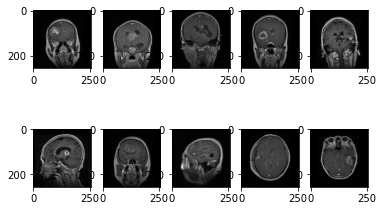

In [5]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(tr_images[i*i],cmap='gray')
plt.show()

In [4]:
brain_model1 = keras.Sequential([
                                    layers.Conv2D(32,4,padding='valid',strides=(1, 1),activation='relu',input_shape=(256, 256, 1),use_bias=True,kernel_initializer="HeNormal",bias_initializer="HeNormal"),
                                    layers.MaxPooling2D(padding="valid",pool_size=(2,2)),
                                    layers.Conv2D(64,4,padding='valid',strides=(1, 1),activation='relu'),
                                    layers.MaxPooling2D(padding="valid",pool_size=(2,2)),
                                    layers.Conv2D(64,4,padding='valid',strides=(1, 1),activation='relu'),
                                    layers.MaxPooling2D(padding="valid",pool_size=(2,2)),
                                    layers.Flatten(),
                                    layers.Dense(50,activation='relu'),
                                    layers.Dense(4,activation="softmax")])
   

In [45]:
brain_model1.compile(loss = losses.CategoricalCrossentropy(),  
   optimizer = tf.keras.optimizers.Adam() , metrics = [metrics.CategoricalAccuracy()])
his2 = brain_model1.fit(tr_images,tr_labels,epochs = 4 )

Epoch 1/4
179/179 [==============================] - 333s 2s/step - loss: 0.3497 - categorical_accuracy: 0.8951
Epoch 2/4
179/179 [==============================] - 388s 2s/step - loss: 0.3566 - categorical_accuracy: 0.8876
Epoch 3/4
179/179 [==============================] - 402s 2s/step - loss: 0.2741 - categorical_accuracy: 0.9079
Epoch 4/4
179/179 [==============================] - 382s 2s/step - loss: 0.1603 - categorical_accuracy: 0.9440


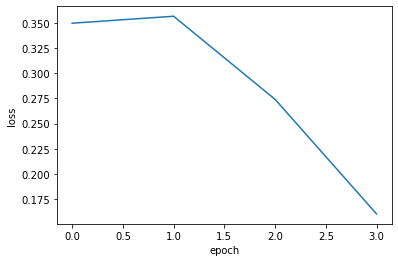

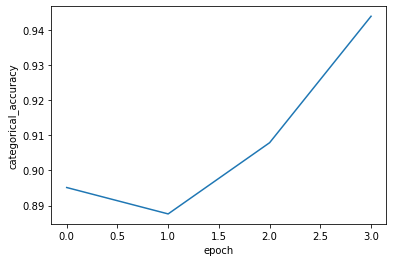

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, 4),his2.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.figure()
plt.plot(np.arange(0, 4),his2.history['categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('categorical_accuracy')
plt.show()

In [46]:
brain_model1.evaluate(ts_images,ts_labels)

41/41 [==============================] - 16s 391ms/step - loss: 0.3716 - categorical_accuracy: 0.8993


[0.3716312050819397, 0.8993135094642639]

In [47]:
brain_model1.save_weights('./brain_cancer1.cpkt')

In [6]:
#testing
def Model(image) :
    if np.argmax(brain_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 3 : 
        return "Pituitary"
    elif np.argmax(brain_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 1 :
        return "Glioma"
    elif np.argmax(brain_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 2 :
        return "Notumor"
    else :
        return "meningioma"

In [55]:
Model(ts_images[65])

'Glioma'

In [7]:
Model(ts_images[548])

'meningioma'

In [58]:
Model(ts_images[986])

'Notumor'

In [63]:
Model(ts_images[1300])

'Pituitary'